In [85]:
import numpy as np

In [86]:
alpha = np.load("alpha.npy").astype(complex)
lamb = np.load("lambda.npy").astype(complex)

In [99]:
atom_num = 11
mode_num = 27
c = 299792458
nu_in = 1/(514e-16)
hc_over_kT = 207.120302 # in cm^-1
angs_to_bohr = 1/0.529177
cm_to_bohr = angs_to_bohr*1e8
broadening = 10

In [93]:
with open("PYRIDINE-VIBRATIONS-1.mol") as f:
    nus = np.array(f.readlines()[atom_num+3:atom_num+mode_num+3]).astype(float)*100*2.418884326509e-17

In [108]:
cross_sections = np.zeros((2,27)).astype(complex)

for p in range(2):
    for m in range(mode_num):
        lambda_k = 0.5*(lamb[p][1][m][0][0]+lamb[p][1][m][1][1])
        alpha_derivative = (alpha[p][1][m]-alpha[p][0][m])/(0.001*angs_to_bohr)
        
        alpha_pk = (1+lambda_k)*0.5*(alpha_derivative[0][0]+alpha_derivative[1][1])
        gamma_pk = ((alpha_derivative[0][0]-alpha_derivative[1][1])*(lamb[p][1][m][0][0]-lamb[p][1][m][1][1]))+((alpha_derivative[0][1]+alpha_derivative[1][0])*(lamb[p][1][m][0][1]+lamb[p][1][m][1][0]))
        
        cross_sections[p][m] = 0.85424435309*(1/cm_to_bohr)**2*((1/nu_in)*0.125*(nu_in-nus[m])**4)*(1/cm_to_bohr)**3*(np.linalg.norm(alpha_pk+0.125*(gamma_pk))**2)/(1-np.exp(-nus[m]/hc_over_kT))

In [109]:
import matplotlib.pyplot as plt

with open("PYRIDINE-VIBRATIONS-1.mol") as f:
    wave_numbers = np.array(f.readlines()[atom_num+3:atom_num+mode_num+3]).astype(float)

def lorentzian(x):
    L = 0
    for i,v in enumerate(wave_numbers):
        L += (1/np.pi)*(0.5*broadening*cross_sections[0][i])/((x-v)**2+(0.5*broadening)**2)
    return L.real

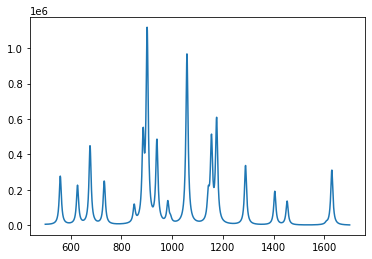

In [110]:
x = np.linspace(500,1700,1200)

plt.plot(x,lorentzian(x))
plt.show();